In [37]:
import pandas as pd
from sklearn.datasets import load_iris
iris_data = load_iris()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [18]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [30]:
iris_df = pd.DataFrame(data = iris.data,columns = iris.feature_names)

In [25]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
iris_df["target"] = iris.target
iris_df["species"] =iris.target_names[iris.target]

In [34]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [35]:
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>

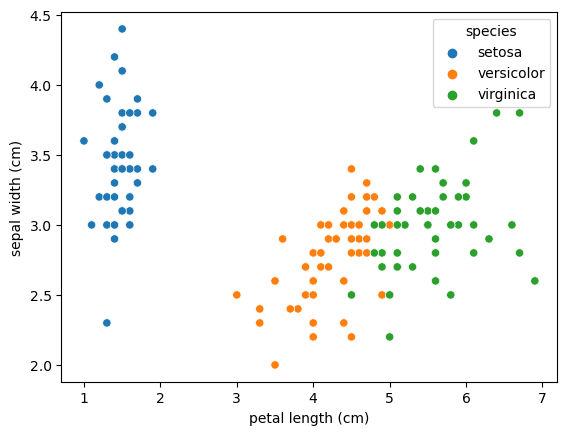

In [45]:
sns.scatterplot(x = "petal length (cm)",y = "sepal width (cm)",hue = "species",data =iris_df)

# converting categorical variables in to numbers:

In [46]:
flower_mapping = {"setosa":0,"versicolor":1,"virginica":2}
iris_df["species"]= iris_df["species"].map(flower_mapping)

In [47]:
x = iris_df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]].values
y = iris_df[["species"]].values

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [50]:
model.fit(x,y)

C:\Users\abc\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
model.score(x,y)

0.9733333333333334

In [54]:
expected = y
predicted = model.predict(x)

In [55]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected,predicted)

In [57]:
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [66]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

